In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from wmb import mm10

In [2]:
_dir = '/home/qzeng_salk_edu/project/filestore/230201-gene-mC-RNA-corr'

In [3]:
gene_corr = pd.read_hdf("GeneCorrs.hdf")
gene_meta = mm10.get_gene_metadata()
shuffle_corr = np.load(f"{_dir}/shuffle_corr.npz")["data"]

In [15]:
gene_corr.shape,gene_meta.shape

((30364, 5), (32285, 23))

In [4]:
gene_meta['length'] = gene_meta['end'] - gene_meta['start']
gene_id_to_length = gene_meta['length'].to_dict()
gene_corr['length'] = gene_corr.index.map(gene_id_to_length)

In [6]:
#gene_corr = gene_corr[gene_corr['length'] < 2000]

In [7]:
def define_gene_category(x):
    if x < 2000:
        cate = '<2kb gene'
    elif x > 100000:
        cate = '>100kb gene'
    else:
        cate = '2kb-100kb gene'
    return cate

gene_corr['gene_category'] = gene_corr['length'].apply(define_gene_category)

In [8]:
gene_corr['gene_category'].value_counts()

2kb-100kb gene    23879
<2kb gene          3805
>100kb gene        2680
Name: gene_category, dtype: int64

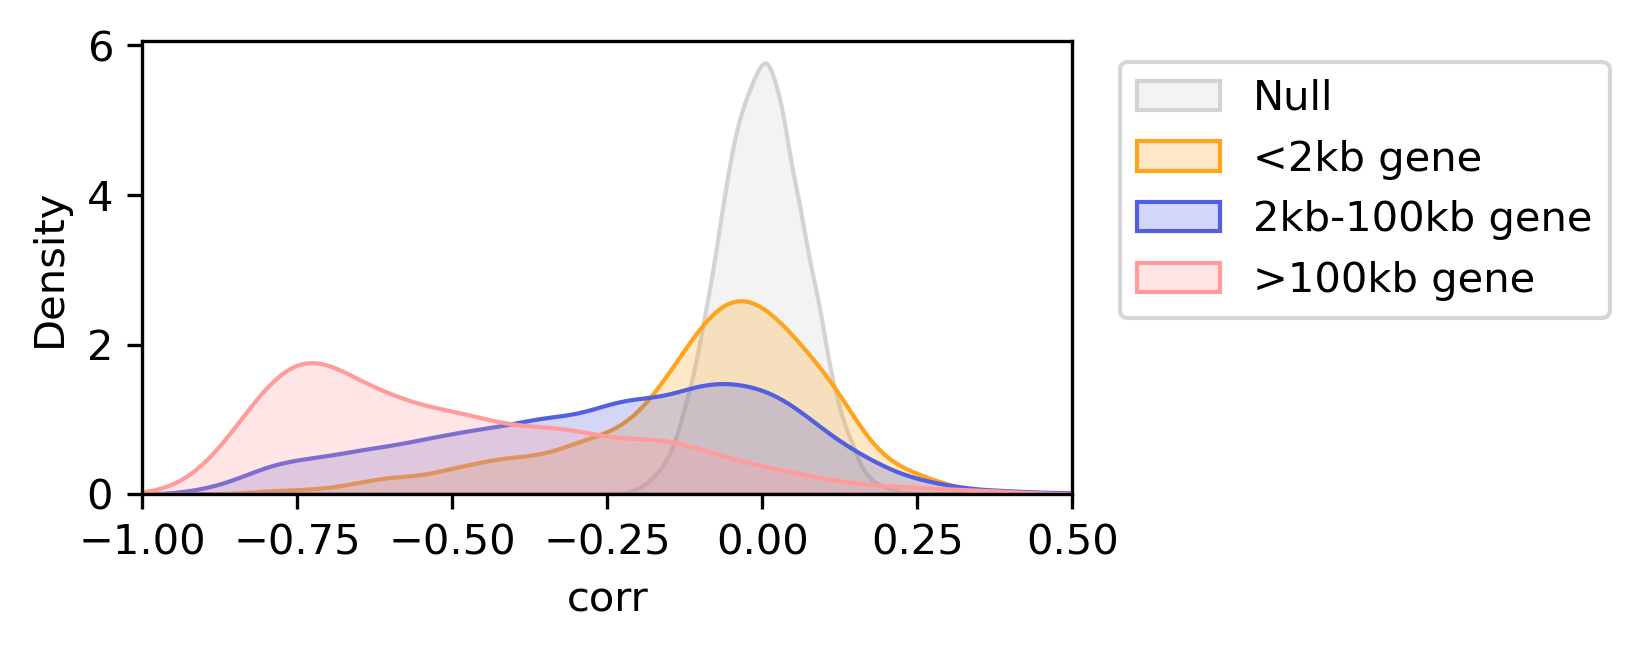

In [16]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=300)

sns.kdeplot(
    data=shuffle_corr, bw_adjust=1, ax=ax, fill=True, color="lightgrey", label="Null"
)

sns.kdeplot(
    gene_corr.loc[gene_corr.gene_category == '<2kb gene']["corr"],
    bw_adjust=1,
    ax=ax,
    fill=True,
    color='#FFA41B',
    label="<2kb gene",
)

sns.kdeplot(
     gene_corr.loc[gene_corr.gene_category == '2kb-100kb gene']["corr"],
    bw_adjust=1,
    ax=ax,
    fill=True,
    color='#525FE1',
    label="2kb-100kb gene",
)

sns.kdeplot(
     gene_corr.loc[gene_corr.gene_category == '>100kb gene']["corr"],
    bw_adjust=1,
    ax=ax,
    fill=True,
    color='#FF9B9B',
    label=">100kb gene",
)

ax.set(xlim=(-1, 0.5))
ax.legend(bbox_to_anchor=(1.6, 1))
#fig.savefig("GenemCHRNA.GeneLength.corr.pdf", bbox_inches = 'tight')